##Installing and Loading Necessary Libraries

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

## Loading Dataset Containing Annual Electric Vehicle Sales Data by Category

In [ ]:
df = pd.read_csv('RS_Session_260_AU_1872_A_and_B.csv')
df.head()

,Sl. No.,Vehicle Category,2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,2020 - Total,2020 - EV,2020 - %,2021 - Total,2021 - EV,2021 - %,2022 - Total,2022 - EV,2022 - %,2023 (Till 01-08-2023) - Total,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %
0,1,Two Wheeler,19576235,17067,0.09,18644700,30389,0.16,14305129,29113,0.20,13926217,156243,1.12,15592118,631181,4.05,9276337,489637,5.28
1,2,Three Wheeler,764806,110133,14.40,765867,133489,17.43,400893,90385,22.55,390820,158129,40.46,677034,350247,51.73,572654,300114,52.41
2,3,Four Wheeler,2999288,1047,0.03,2822782,962,0.03,2396428,3207,0.13,2945340,12259,0.42,3346973,33205,0.99,2020459,40186,1.99
3,4,Goods Vehicles,886047,658,0.07,799661,54,0.01,503358,15,0.00,602805,1118,0.19,804409,653,0.08,490920,1512,0.31
4,5,Public Service Vehicle,79317,50,0.06,81022,508,0.63,40328,88,0.22,15434,1177,7.63,45448,1972,4.34,47058,985,2.09


## Cleaning EV Sales Data: Dropping Unneccesary Columns and Rows

In [ ]:
df = df.drop(columns=['2018 - Total', '2018 - %', '2019 - Total', '2019 - %', '2020 - Total', '2020 - %', '2021 - Total', '2021 - %', '2022 - Total', '2022 - %', '2023 (Till 01-08-2023) - Total', '2023 (Till 01-08-2023) - %'])
df = df.drop(index=[3, 4])
df.head()

,Sl. No.,Vehicle Category,2018 - EV,2019 - EV,2020 - EV,2021 - EV,2022 - EV,2023 (Till 01-08-2023) - EV
0,1,Two Wheeler,17067,30389,29113,156243,631181,489637
1,2,Three Wheeler,110133,133489,90385,158129,350247,300114
2,3,Four Wheeler,1047,962,3207,12259,33205,40186


##Exploring EV Sales Data Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sl. No.                      3 non-null      int64 
 1   Vehicle Category             3 non-null      object
 2   2018 - EV                    3 non-null      int64 
 3   2019 - EV                    3 non-null      int64 
 4   2020 - EV                    3 non-null      int64 
 5   2021 - EV                    3 non-null      int64 
 6   2022 - EV                    3 non-null      int64 
 7   2023 (Till 01-08-2023) - EV  3 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 320.0+ bytes


##Checking for Missing Values in EV Sales Data

In [ ]:
df.isnull().sum()

,0
Sl. No.,0
Vehicle Category,0
2018 - EV,0
2019 - EV,0
2020 - EV,0
2021 - EV,0
2022 - EV,0
2023 (Till 01-08-2023) - EV,0


##Adding 'Total Sales' Column to EV Data

In [ ]:
df['Total Sales'] = df.iloc[:, 2:].sum(axis=1)
df.head()

,Sl. No.,Vehicle Category,2018 - EV,2019 - EV,2020 - EV,2021 - EV,2022 - EV,2023 (Till 01-08-2023) - EV,Total Sales
0,1,Two Wheeler,17067,30389,29113,156243,631181,489637,1353630
1,2,Three Wheeler,110133,133489,90385,158129,350247,300114,1142497
2,3,Four Wheeler,1047,962,3207,12259,33205,40186,90866


##Statistical Summary of EV Sales Data

In [ ]:
df.describe()

,Sl. No.,2018 - EV,2019 - EV,2020 - EV,2021 - EV,2022 - EV,2023 (Till 01-08-2023) - EV,Total Sales
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00
mean,2.0,42749.000000,54946.666667,40901.666667,108877.000000,338211.000000,276645.666667,8.623310e+05
std,1.0,58903.418339,69592.820580,44768.632069,83678.956088,299169.639362,225642.687345,6.763971e+05
min,1.0,1047.000000,962.000000,3207.000000,12259.000000,33205.000000,40186.000000,9.086600e+04
25%,1.5,9057.000000,15675.500000,16160.000000,84251.000000,191726.000000,170150.000000,6.166815e+05
50%,2.0,17067.000000,30389.000000,29113.000000,156243.000000,350247.000000,300114.000000,1.142497e+06
75%,2.5,63600.000000,81939.000000,59749.000000,157186.000000,490714.000000,394875.500000,1.248064e+06
max,3.0,110133.000000,133489.000000,90385.000000,158129.000000,631181.000000,489637.000000,1.353630e+06


##Bar Plot: Total Sales by Vehicle Category

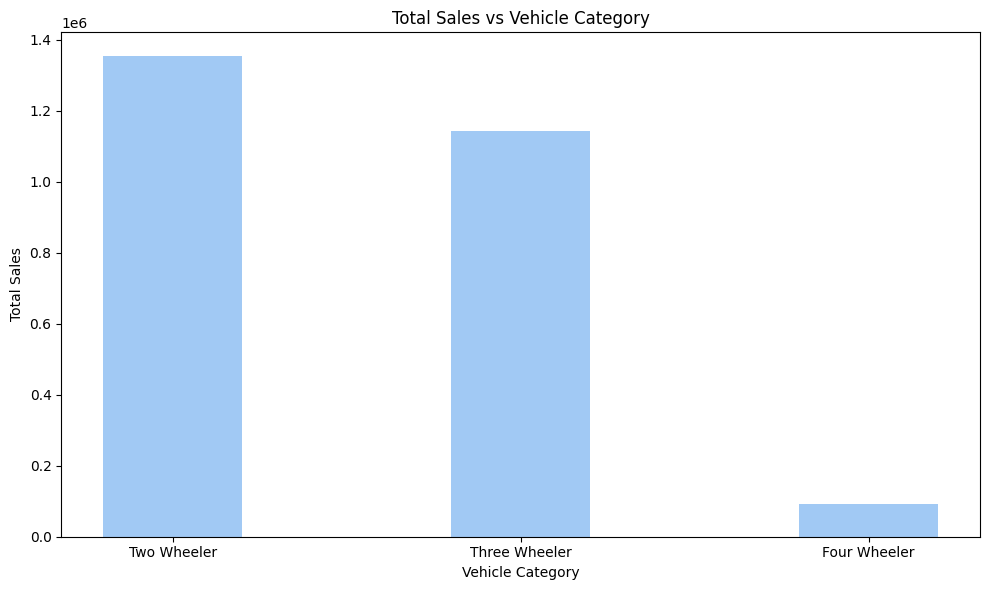

In [ ]:
sns.set_palette('pastel')
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(df['Vehicle Category'], df['Total Sales'], width = bar_width)
plt.xlabel('Vehicle Category')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Vehicle Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##Loading Second Dataset Containing Statewise Distribution of EV

In [ ]:
df1 = pd.read_csv('statewise_distribution_of_ev.csv')
df1.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler
0,0,Andaman and Nicobar Island,1,30,81
1,1,Arunachal Pradesh,14,0,5
2,2,Assam,721,47041,161
3,3,Bihar,5003,59079,114
4,4,Chandigarh,298,1410,182


#Cleaning Statewise EV Data: Removing Unneccesary Column

In [ ]:
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler
0,Andaman and Nicobar Island,1,30,81
1,Arunachal Pradesh,14,0,5
2,Assam,721,47041,161
3,Bihar,5003,59079,114
4,Chandigarh,298,1410,182


##Exploring Statewise EV Data Structure

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State Name     32 non-null     object
 1   Two Wheeler    32 non-null     int64 
 2   Three Wheeler  32 non-null     int64 
 3   Four Wheeler   32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


##Checking for Missing Values in Statewise EV Data

In [ ]:
df1.isnull().sum()

,0
State Name,0
Two Wheeler,0
Three Wheeler,0
Four Wheeler,0


##Bar Plot: EV Sales by Type Across States in India

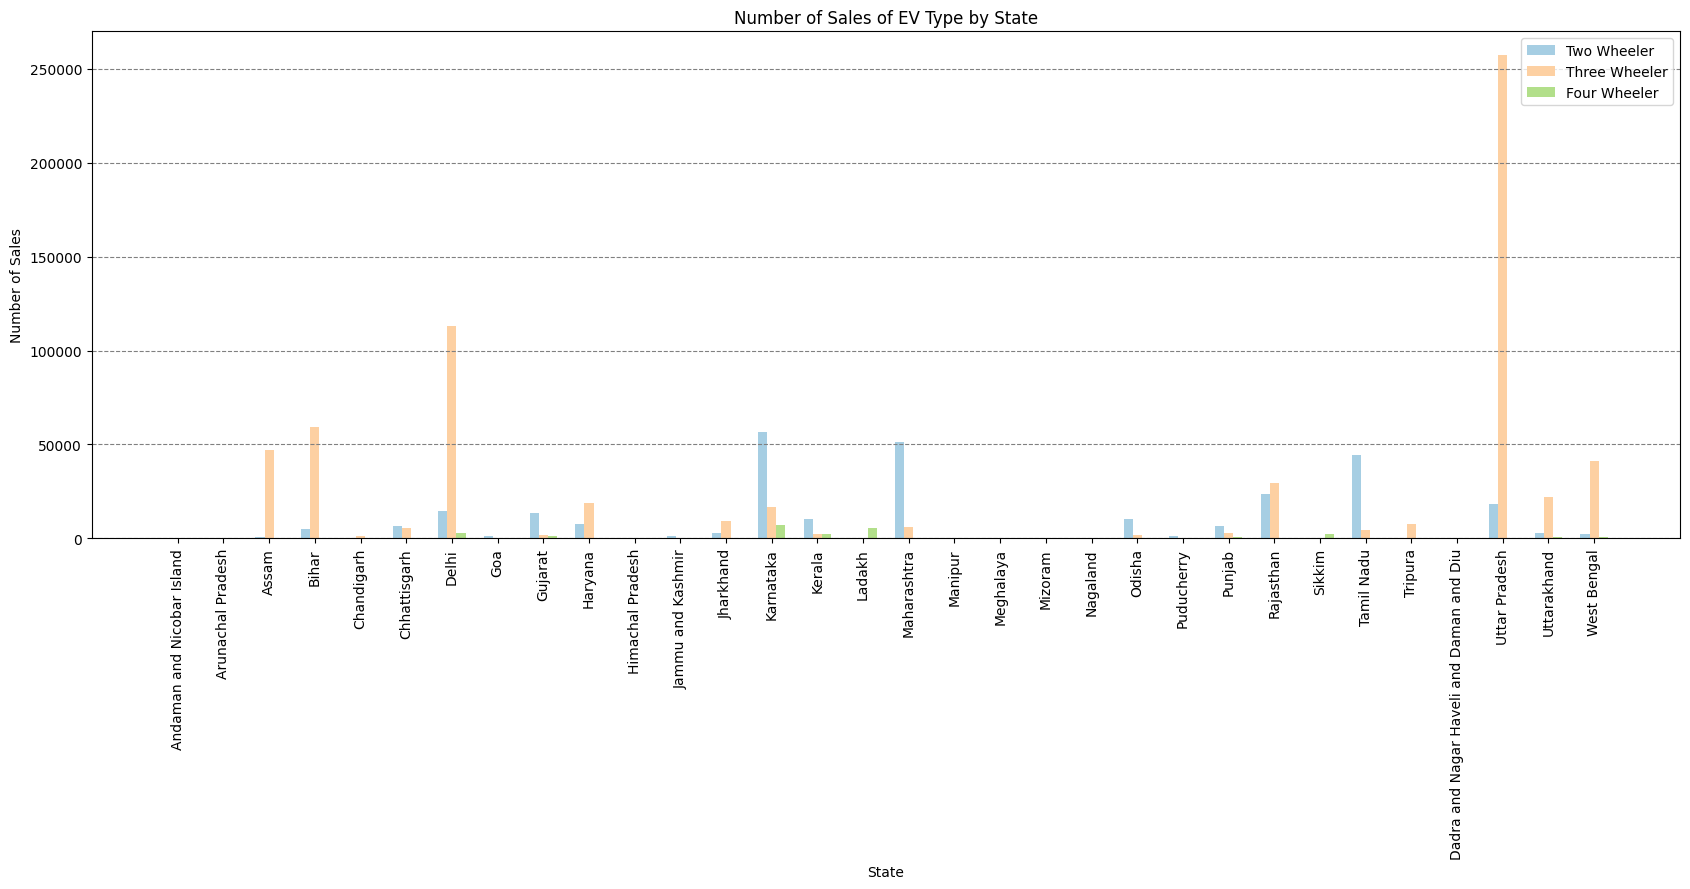

In [ ]:
fig, ax = plt.subplots(figsize=(17,9))
width = 0.2

ax.bar(df1.index - width, df1['Two Wheeler'], width, label='Two Wheeler', color="#a6cee3")
ax.bar(df1.index, df1['Three Wheeler'], width, label='Three Wheeler', color="#fdd0a2")
ax.bar(df1.index + width, df1['Four Wheeler'], width, label='Four Wheeler', color="#b2df8a")

ax.set_xlabel('State')
ax.set_ylabel('Number of Sales')
ax.set_title('Number of Sales of EV Type by State')

ax.set_xticks(df1.index)
ax.set_xticklabels(df1['State Name'], rotation=90)

ax.grid(axis='y', linestyle='--', color='gray')

ax.legend()

plt.tight_layout()
plt.show()


##Loading Third Dataset Containing Annual EV Sales by Category

In [ ]:
df2 = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
df2.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0,43
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51,1098
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0,1
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0,2
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578,1069


##Aggregating Total Sales by Vehicle Type

In [ ]:
vehicle_type_sales = df2.groupby('Cat')['Total'].sum()
print(vehicle_type_sales)

Cat
2W     2279448
3W     1934263
LMV     206388
MMV        804
Name: Total, dtype: int64


##Pie Chart: Sales Distribution by Vehicle Type

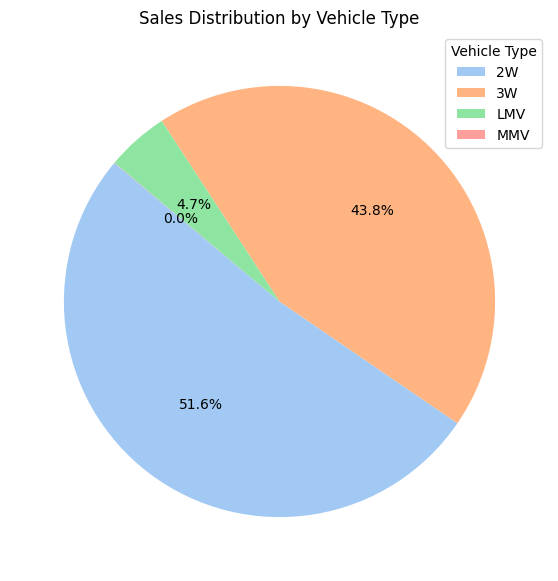

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(vehicle_type_sales, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Vehicle Type')
plt.legend(title='Vehicle Type', loc='upper right', labels=vehicle_type_sales.index)  # Add legend with title and labels
plt.show()

##Loading Fourth Dataset Containing Survey Response Data Regarding EV

In [ ]:
df3 = pd.read_csv('Response.csv')
df3.head()

,What is your gender?,What is your age?,What is your Monthly Household Income?,K1,K2,K3,K4,K5,ATT1,ATT2,ATT3,ATT4,ATT5,P1,P2,P3,P4,P5
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


##Checking for Missing Values in Survey Response Data

In [ ]:
df3.isnull().sum()

,0
What is your gender?,0
What is your age?,0
What is your Monthly Household Income?,0
K1,0
K2,0
K3,0
K4,0
K5,0
ATT1,0
ATT2,0


##Visualizing Distributions of Survey Response Data Columns

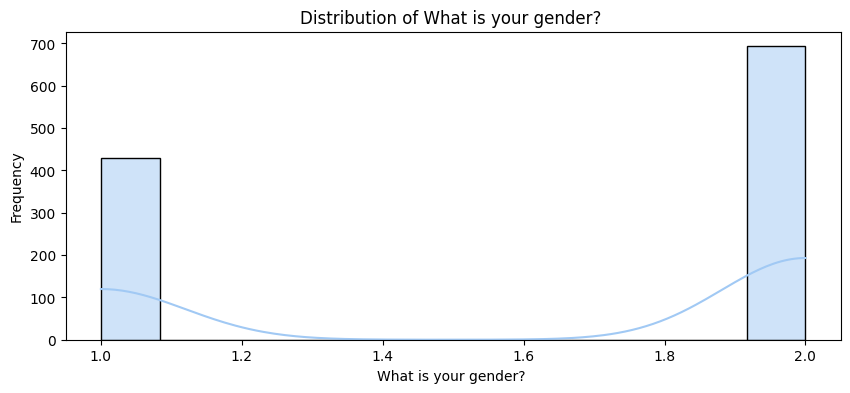

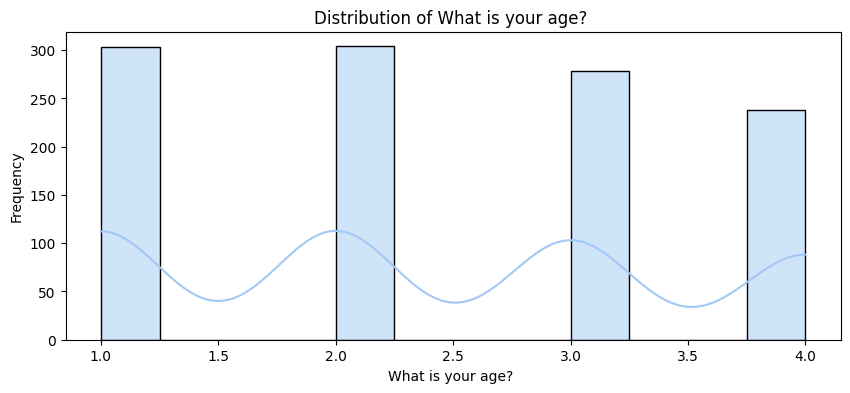

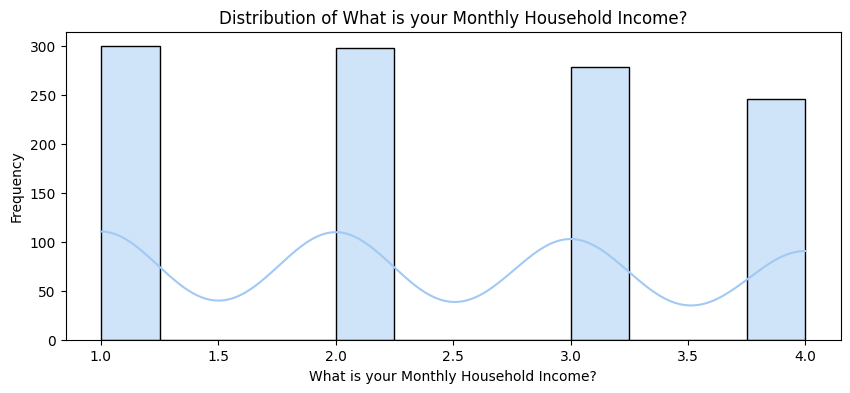

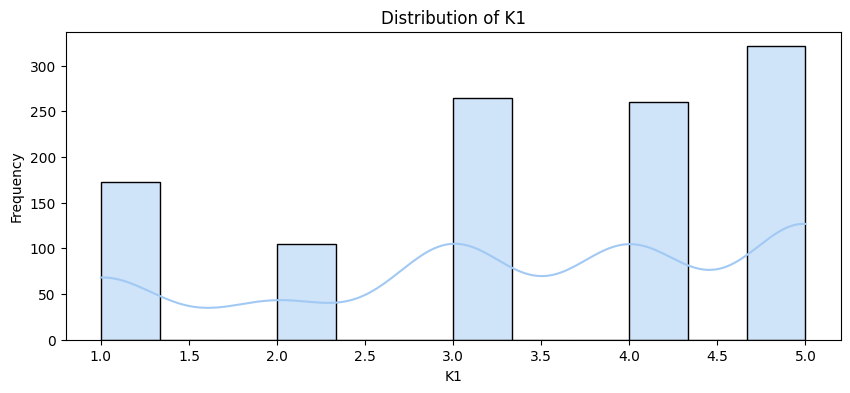

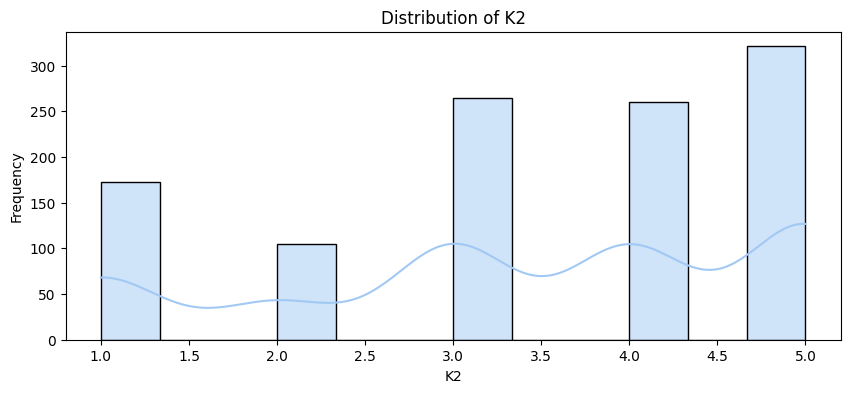

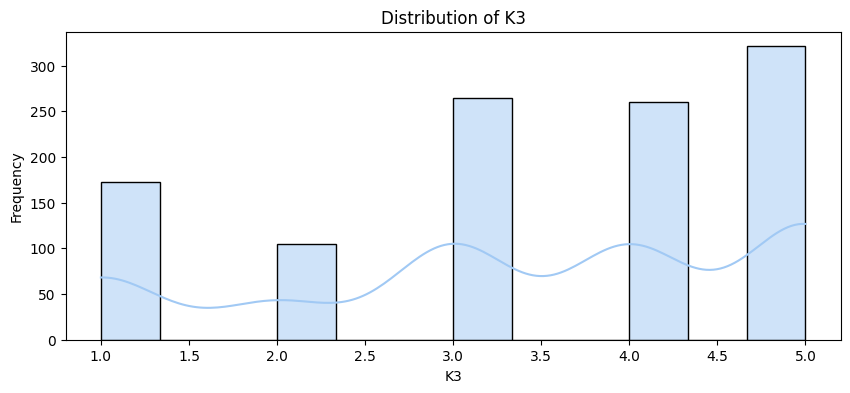

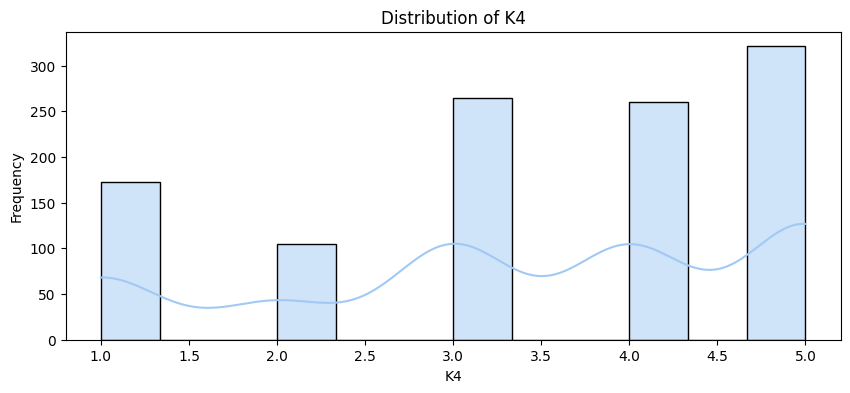

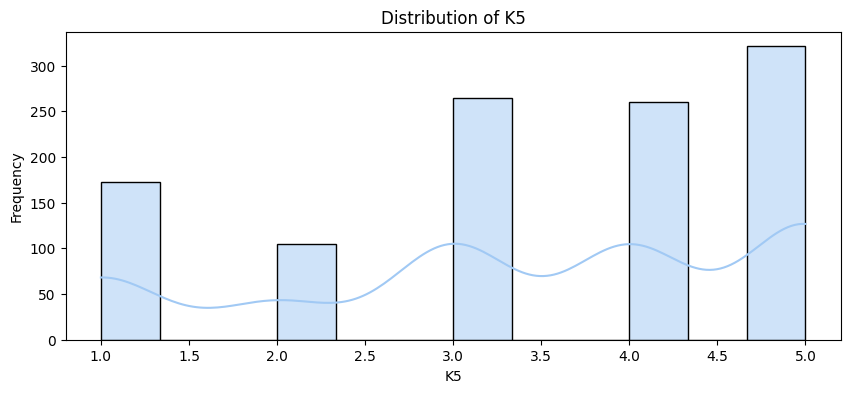

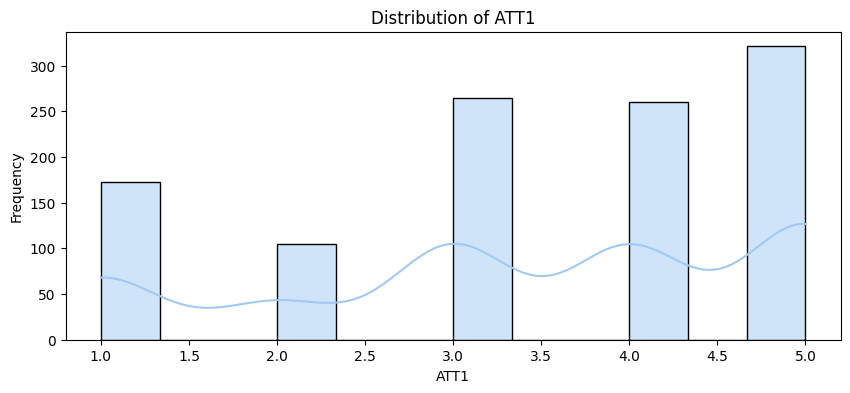

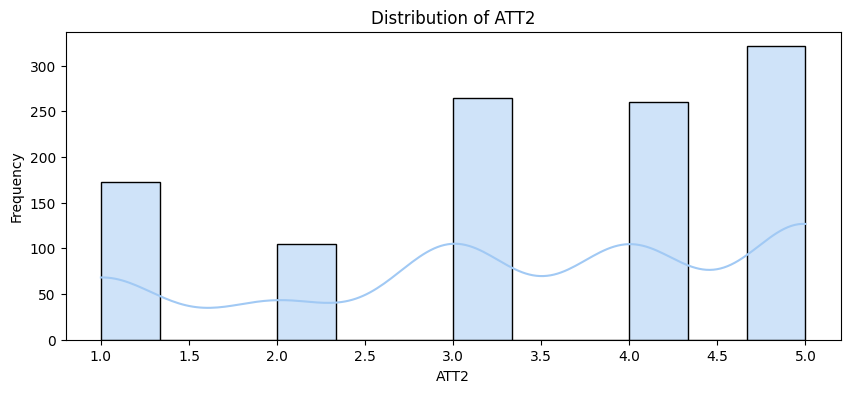

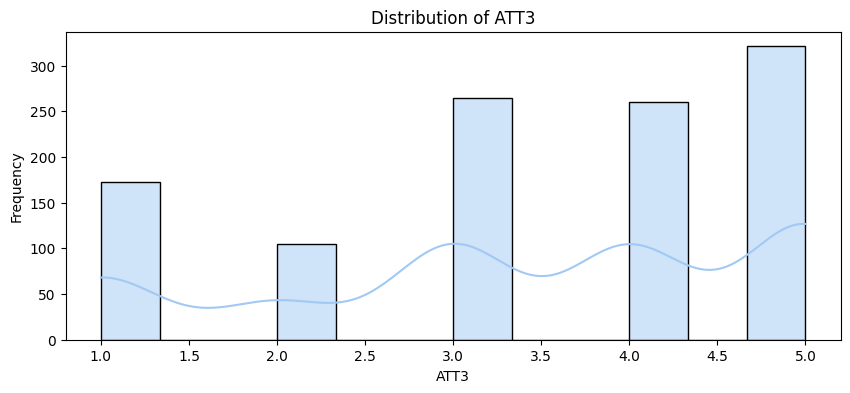

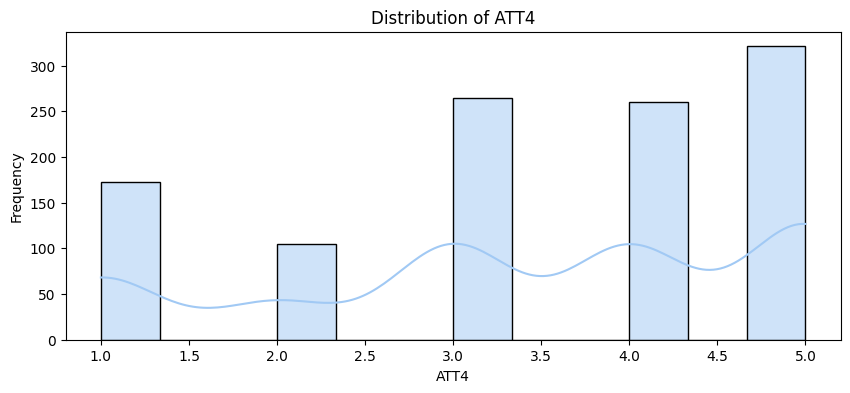

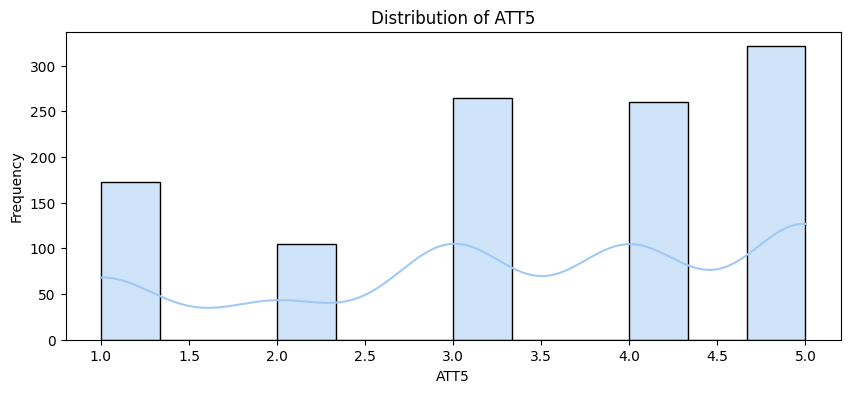

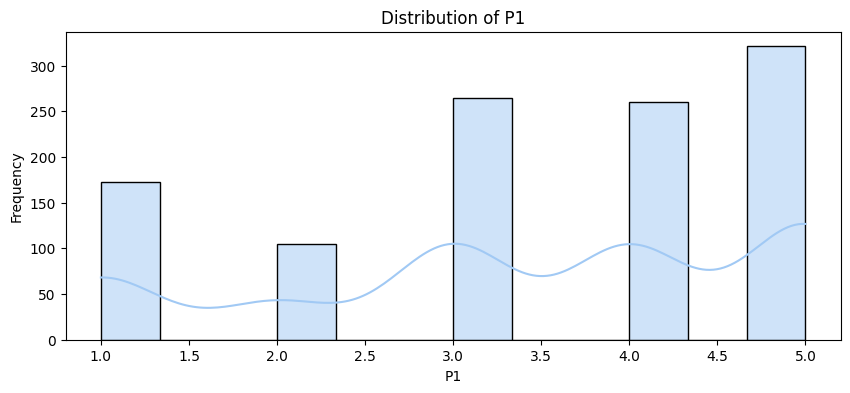

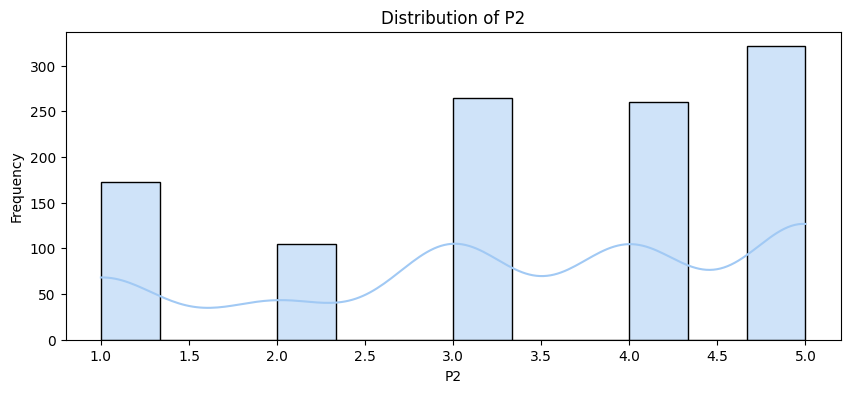

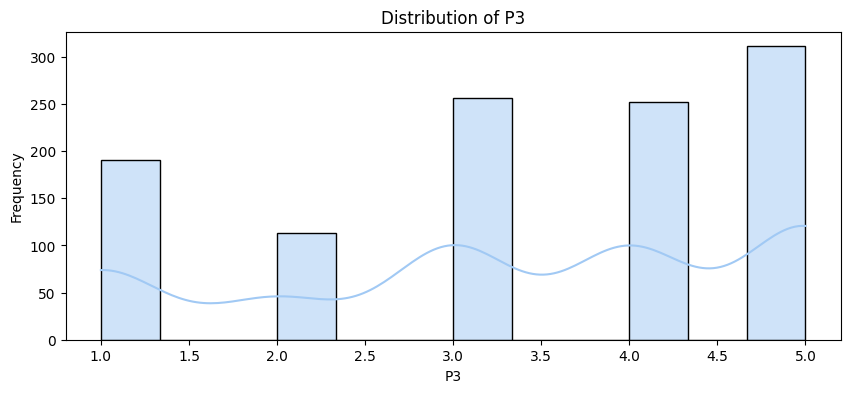

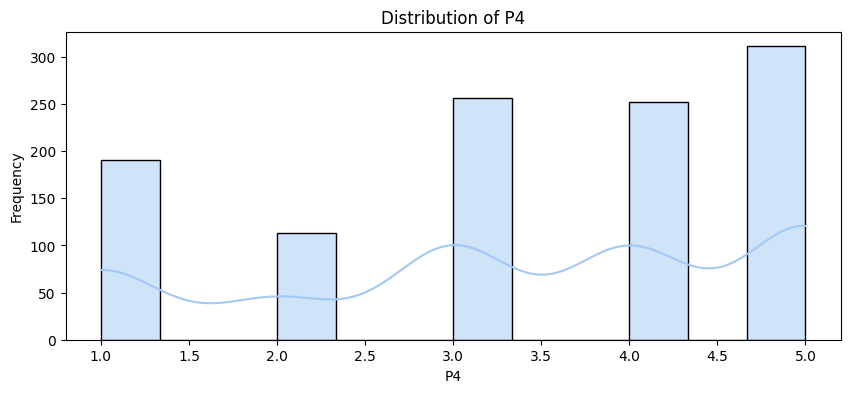

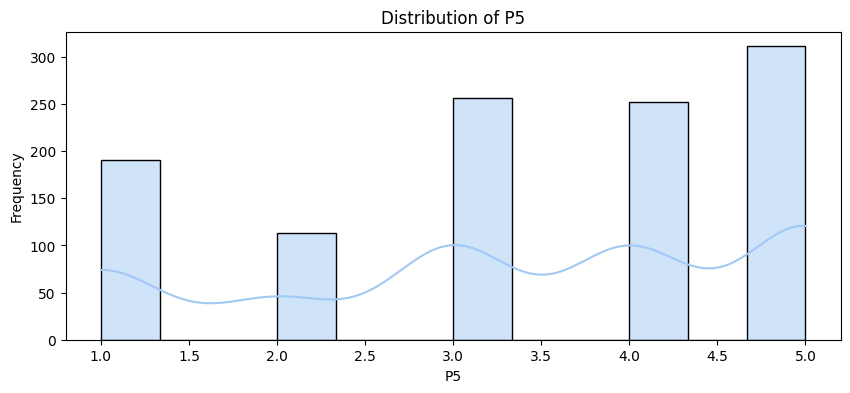

In [ ]:
for column in df3.columns:
  plt.figure(figsize=(10, 4))
  sns.histplot(df3[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

##Heatmap: Correlation Matrix of Survey Response Data

<Axes: >

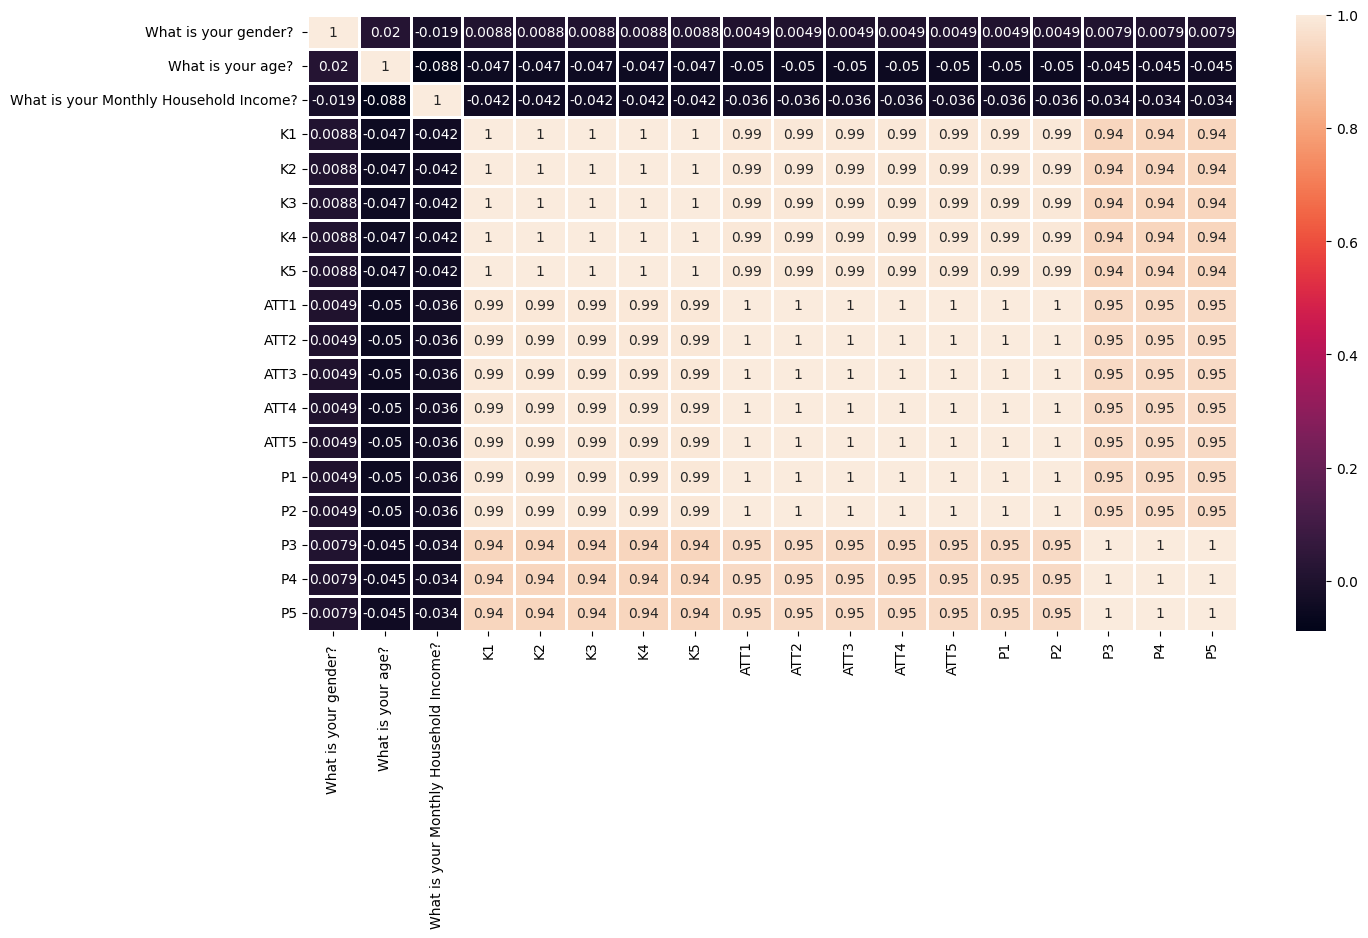

In [ ]:
ax = plt.figure(figsize=(15, 8))
sns.heatmap(df3.corr(), linewidth=1, linecolor='white', annot=True)

##Scaling Survey Response Data Features Using StandardScaler

In [ ]:
X = df3.iloc[:, 3:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Performing PCA: Reducing Survey Response Data to 2 Principal Components

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_results

,PC1,PC2
0,6.647038,-0.044915
1,3.865006,-0.055376
2,6.647038,-0.044915
3,3.865006,-0.055376
4,1.082973,-0.065838
...,...,...
1118,6.647038,-0.044915
1119,3.865006,-0.055376
1120,-4.481092,-0.086761
1121,6.647038,-0.044915


##Explained Variance Ratio of PCA Components

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

Explained variance by each component: [0.97934412 0.01655036]


##Cumulative Explained Variance of PCA Components

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance)
print(cumulative_explained_variance)

[0.97934412 0.99589448]


##Scree Plot: Explained Variance Ratio by Number of PCA Components

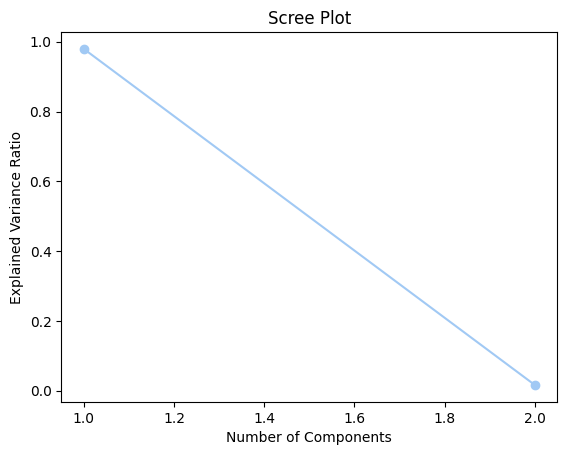

In [ ]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

##Calculating Inertia for K-Means Clustering with Different Number of Clusters

In [ ]:
inertia = []
K = range(1, 10)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_pca)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

##Elbow Method: Identifying Optimal Number of Clusters for K-Means

In [ ]:
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

<ipython-input-32-ad7101fe9bf6>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', color='red', label='Inertia')


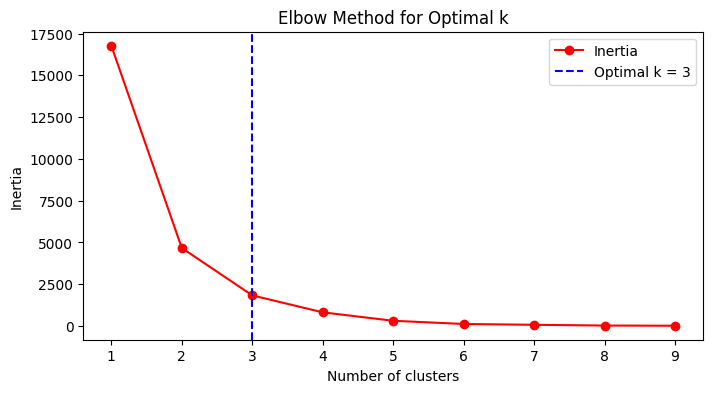

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', color='red', label='Inertia')
plt.axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k = {optimal_k}')  # Add vertical line for optimal k
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

##Applying K-Means Clustering with Optimal Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df3['Cluster'] = clusters

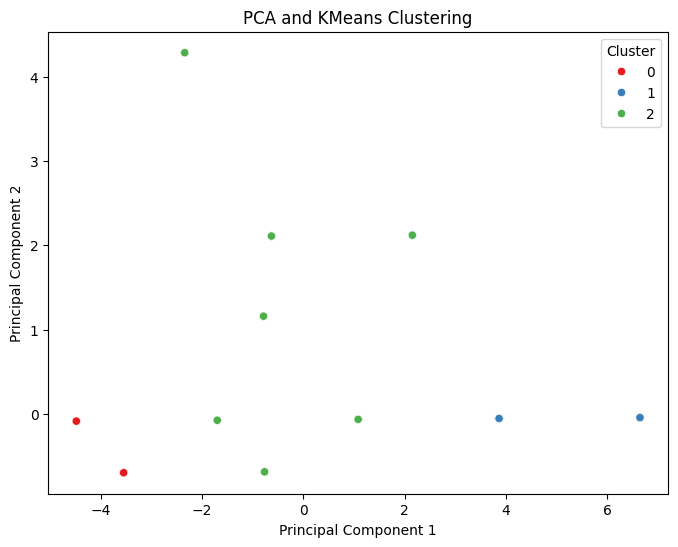

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df3['Cluster'], palette='Set1')
plt.title('PCA and KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Cluster Profiles: Average Features for Each K-Means Cluster

In [ ]:
cluster_profile = df3.groupby('Cluster').mean()
print(cluster_profile)

         What is your gender?   What is your age?   \
Cluster                                              
0                     1.610932            2.308682   
1                     1.604317            2.438849   
2                     1.627341            2.436330   

         What is your Monthly Household Income?        K1        K2        K3  \
Cluster                                                                         
0                                      2.440514  4.974277  4.974277  4.974277   
1                                      2.485612  1.377698  1.377698  1.377698   
2                                      2.372659  3.539326  3.539326  3.539326   

               K4        K5      ATT1      ATT2      ATT3      ATT4      ATT5  \
Cluster                                                                         
0        4.974277  4.974277  5.000000  5.000000  5.000000  5.000000  5.000000   
1        1.377698  1.377698  1.377698  1.377698  1.377698  1.377698  1.377698   

##Loading Fifth Dataset Containing Features of Electric Two Wheelers

In [ ]:
df4 = pd.read_csv('bike_dataset.csv')
df4.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


##Cleaning Dataset: Dropping Unnecessary Rows and Columns

In [ ]:
df4 = df4[df4['type_of_bike'] != 'Petrol Bike']
df4.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [ ]:
df4.drop(['model_name', 'type_of_bike', 'links', 'CC'], axis=1, inplace=True)
df4.head()

,price,mileage,weight_in_kg,acceleration_speed,top_speed
0,99000,320.0,100,4.2,70.0
1,109999,236.0,110,3.6,100.0
2,69900,200.0,95,NaN,25.0
3,102999,200.0,120,3.0,100.0
4,85099,181.0,121,2.9,116.0


##Handling Missing Values in 'acceleration_speed' Column of Dataset

In [ ]:
df4['acceleration_speed'] = df4['acceleration_speed'].replace ('NaN', np.nan)
df4['acceleration_speed'] = df4['acceleration_speed'].fillna(df4['acceleration_speed'].mean())
df4.head()

,price,mileage,weight_in_kg,acceleration_speed,top_speed
0,99000,320.0,100,4.200000,70.0
1,109999,236.0,110,3.600000,100.0
2,69900,200.0,95,6.166562,25.0
3,102999,200.0,120,3.000000,100.0
4,85099,181.0,121,2.900000,116.0


##Feature Selection

In [ ]:
features = ['price', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']
df4_selected = df4[features]

##Scaling Dataset Features Using StandardScaler

In [ ]:
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(df4_selected)

##Performing PCA: Reducing Data to 2 Principal Components

In [ ]:
pca1 = PCA(n_components=2)
df4_pca = pca1.fit_transform(scaled_data)
pca1_results = pd.DataFrame(df4_pca, columns=['PC1', 'PC2'])
pca1_results

,PC1,PC2
0,2.464079,2.328662
1,2.769508,1.268598
2,-0.077752,1.127103
3,2.644015,0.921320
4,2.560771,0.837216
5,3.126136,0.470269
6,1.568405,0.864391
7,0.165797,-0.177807
8,0.049082,1.897663
9,-0.549992,0.771388


##Explained Variance Ratio of PCA Components

In [ ]:
explained_variance1 = pca1.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance1}")

Explained variance by each component: [0.58626717 0.16427009]


##Cumulative Explained Variance of PCA Components

In [ ]:
cumulative_explained_variance1 = np.cumsum(explained_variance1)
print(cumulative_explained_variance1)

[0.58626717 0.75053726]


##Scree Plot: Explained Variance Ratio by Number of PCA Components

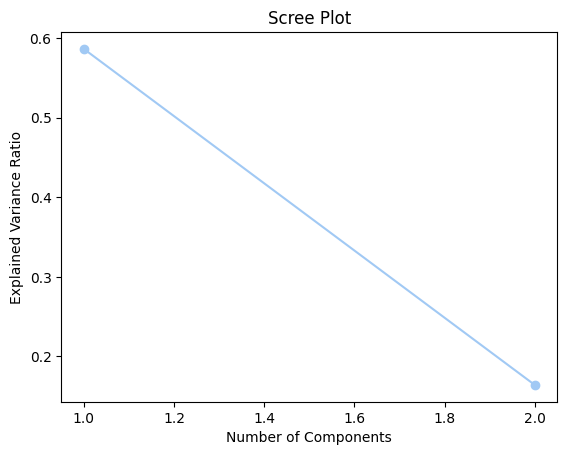

In [ ]:
plt.plot(range(1, len(explained_variance1) + 1), explained_variance1, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

##Calculating Inertia for K-Means Clustering with Different Number of Clusters

In [ ]:
inertia1 = []
K1 = range(1, 10)
for k1 in K1:
  kmeans1 = KMeans(n_clusters=k1, random_state=42)
  kmeans1.fit(df4_pca)
  inertia1.append(kmeans1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

##Elbow Method: Identifying Optimal Number of Clusters for K-Means

In [ ]:
kneedle = KneeLocator(K1, inertia1, curve='convex', direction='decreasing')
optimal_k1 = kneedle.elbow

<ipython-input-49-bffbcce0713e>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K1, inertia1, 'bo-', color='red', label='Inertia')


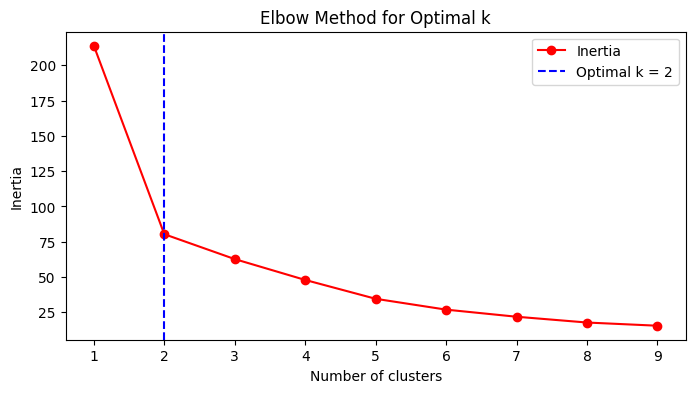

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(K1, inertia1, 'bo-', color='red', label='Inertia')
plt.axvline(x=optimal_k1, color='blue', linestyle='--', label=f'Optimal k = {optimal_k1}')  # Add vertical line for optimal k
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=optimal_k1, random_state=42)
clusters1 = kmeans1.fit_predict(df4_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df4['Cluster1'] = clusters1

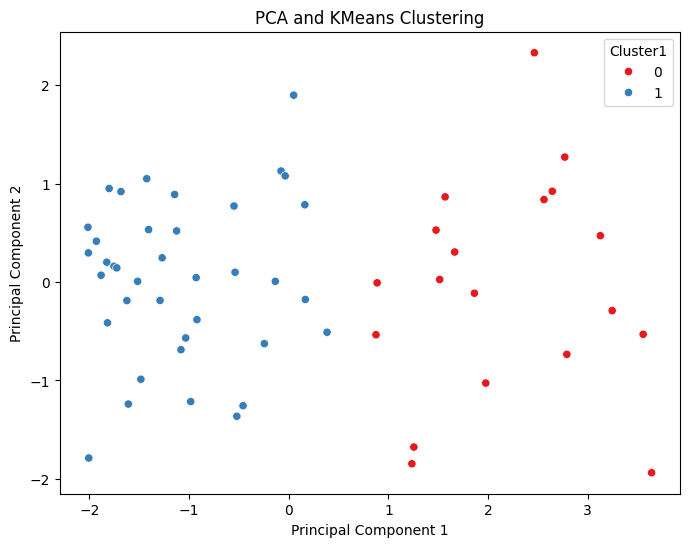

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df4_pca[:, 0], y=df4_pca[:, 1], hue=df4['Cluster1'], palette='Set1')
plt.title('PCA and KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Cluster Profiles: Average Features for Each K-Means Cluster

In [ ]:
cluster1_profile = df4.groupby('Cluster1').mean()
print(cluster1_profile)

                  price     mileage  weight_in_kg  acceleration_speed  \
Cluster1                                                                
0         121758.947368  153.526316    123.263158            4.373503   
1          60177.421053   90.605263     86.421053            7.063092   

          top_speed  
Cluster1             
0         87.631579  
1         38.921053  


##Conclusion
This notebook performed exploratory data analysis and K-Means clustering on multiple datasets related to electric vehicles in India.

Several insights were discovered, including:


*   The distribution of electric vehicle salea across different vehicle types.
*   The popularity of electric vehicles in different states of India.
* Customer sentiments and opinions towards electric vehicles.
* Identification of key features that influence customer choices.

The analysis revealed distinct customer segments with varying preferences and concerns, which could be valuable for targeted marketing and product development strategies.

Further analysis could involve:
* Predictive modeling to forecast future electric vehicle sales.
* Deeper investigation of regional variations in electric vehicle adoption.
* Analysing the impact of government policies and incentives on electric vehicle sales.

This notebook provides a comprehensive overview of the electric vehicle market in India, highlighting key trends. Further conclusions and recommendations are provided in a separate report.

